<a href="https://colab.research.google.com/github/SakshiPatial1234/ANALYSIS-OF-BOSTON-HOUSING-DATASET-USING-APACHE-SPARK/blob/main/Visualisation_with_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
boston = load_boston()

In [ ]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
data = pd.DataFrame(boston.data)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**our prediction - target is "PRICE"**

In [ ]:
data['PRICE'] = boston.target

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  PRICE   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


[]

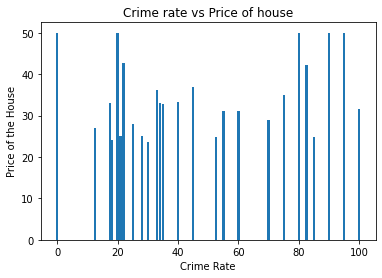

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plotting graph between CRIM and MEDV

plt.bar(data[1],data.PRICE)
plt.xlabel('Crime Rate')
plt.ylabel('Price of the House')
plt.title('Crime rate vs Price of house')
plt.plot()

In [ ]:
data.isnull().sum() # returns the sum of missing values across columns
data.shape # returns a matrix of i rows and j columns.
data.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
PRICE    float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f380fd40dd8>,
      dtype=object)

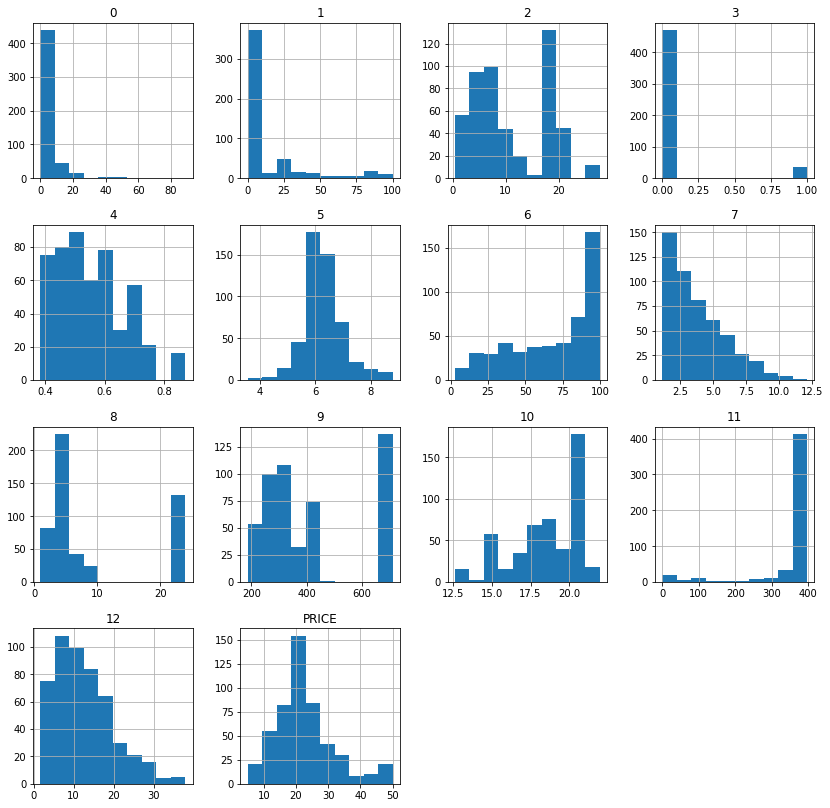

In [ ]:
data.hist(figsize = (14,14)) 

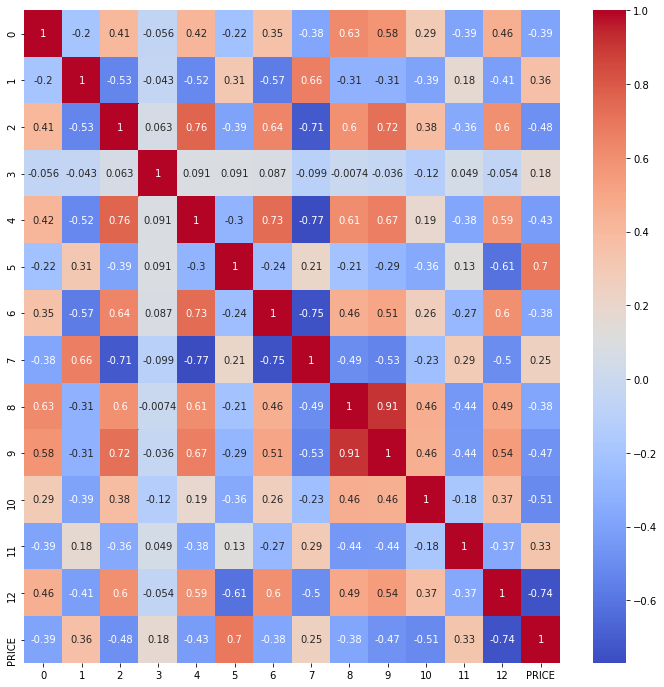

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

**XGBoost**

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql import Window, SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType, StringType, ArrayType, LongType, FloatType, DateType
import xgboost as xgb

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#Separate features from response field
X, y = data.iloc[:,:-1], data.iloc[:,-1]

In [ ]:
#Create DMatrix for Cross Validation
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [ ]:
#Partition dataset
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state= 123)

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
rf = RandomForestRegressor(n_estimators = 400, min_samples_leaf=0.12, random_state=123)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.12,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [ ]:
rf_pred = rf.predict(X_test)
rf_pred2 = rf.predict(X_train)

In [ ]:
rmse_test = mean_squared_error(y_test, rf_pred)**(1/2)
rmse_train = mean_squared_error(y_train, rf_pred2)**(1/2)

**MEASURING METRICS FOR THE TEST AND TRAIN DATA**

In [ ]:
print("Test set RMSE: %f " % (rmse_test))
print("Train set RMSE: %f " % (rmse_train))

Test set RMSE: 5.478919 
Train set RMSE: 5.100675 


In [ ]:
rf_params = {'max_depth': [3,4,5,6],'min_samples_leaf':[0.04,0.06,0.08], 'max_features':[0.2,0.4,0.6,0.8]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(estimator = rf,
                     param_grid = rf_params,
                     cv=10,
                     scoring='neg_mean_squared_error',
                     verbose=1)

In [ ]:
grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  4.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=0.12,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=400, n_jobs=None,
                                             oob_score=False, random_state=123,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

**finding the best parameters for rd and lowest rmse**

In [ ]:
print('Best parameters found for rf: ', grid_rf.best_params_)
print('Lowerst RMSE found for rf: ', np.sqrt(np.sqrt(np.abs(grid_rf.best_score_))))

Best parameters found for rf:  {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04}
Lowerst RMSE found for rf:  2.004750291503652


In [ ]:
list(X.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Checking a scenario**

In [ ]:
new = np.array([0.04, 10, 20, 0.01, 0.4, 5, 40, 3, 10, 380, 20, 300, 9])

In [ ]:
#Check new observation 
print(new)

[4.0e-02 1.0e+01 2.0e+01 1.0e-02 4.0e-01 5.0e+00 4.0e+01 3.0e+00 1.0e+01
 3.8e+02 2.0e+01 3.0e+02 9.0e+00]


In [ ]:
new.shape

(13,)

In [ ]:
new_obs_final = new.reshape(1,-1)

In [ ]:
new_obs_final.shape

(1, 13)

**predict the price for new value**

In [ ]:
grid_rf.predict(new_obs_final)

array([22.86198006])

model variance

In [ ]:
pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = False)

LSTAT      0.628125
RM         0.361297
DIS        0.007148
CRIM       0.002207
NOX        0.000663
PTRATIO    0.000517
TAX        0.000044
B          0.000000
RAD        0.000000
AGE        0.000000
CHAS       0.000000
INDUS      0.000000
ZN         0.000000
dtype: float64

USING XgbOOST rEGRESSOR

In [ ]:
#Let's attempt an XGBoost Regressor to see if we can get a better performance
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree= 0.3, learning_rate = 0.1,
                            max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train, y_train)

[06:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
preds = xg_reg.predict(X_test)
preds2 = xg_reg.predict(X_train)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse2 = np.sqrt(mean_squared_error(y_train, preds2))
print("Attmept 1 Test RMSE: %f" % (rmse))
print("Attempt 1 Train RMSE: %f" % (rmse2))

Attmept 1 Test RMSE: 10.449300
Attempt 1 Train RMSE: 9.537011


**ADDING CROSS VALDIATION FOR BETTER PERFORMANCE**

In [ ]:
#Add cross validation to yield better performance. First, create params dictionary
params = {'objective':'reg:linear', 'colsample_bytree':0.3, 'learning_rate':0.1, 'maz_depth':5,
         'alpha':10}

In [ ]:
#Now cross validate
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold = 3, num_boost_round=50, early_stopping_rounds=10,
                   metrics="rmse", as_pandas=True,seed=123)

[06:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Review output of results
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.679234,0.025626,21.677613,0.050617
1,19.772293,0.016054,19.773320,0.020571
2,18.049563,0.058904,18.065856,0.082746
3,16.430113,0.013615,16.492199,0.020919
4,15.025977,0.062132,15.132644,0.073104


In [ ]:
#Review cross validated results
print((cv_results['test-rmse-mean']).tail(1))
print((cv_results['train-rmse-mean']).tail(1))

49    3.953966
Name: test-rmse-mean, dtype: float64
49    2.18037
Name: train-rmse-mean, dtype: float64


In [ ]:
#Although better, let's add grid search to find best parameters. First, define parameters
gbm_param_grid = {'learning rate': [0.01, 0.1, 0.5, 0.9], 'n_estimators': [200], 'subsample':[0.3,0.5,0.9]}

In [ ]:
#Second, initialize model and run cross validation on initialized estimator
gbm = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', cv=4, verbose=1)

In [ ]:
#Third, fit cross validated model
grid_mse.fit(X, y)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[06:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[06:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    3.8s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning rate': [0.01, 0.1, 0.5, 0.9],
                         'n_estimators': [200], 'subsample': [0.3, 

In [ ]:
#Print best performing parameters and their RMSE scores
print('Best parameters found: ', grid_mse.best_params_)
print('Lowerst RMSE found: ', np.sqrt(np.sqrt(np.abs(grid_mse.best_score_))))

Best parameters found:  {'learning rate': 0.01, 'n_estimators': 200, 'subsample': 0.9}
Lowerst RMSE found:  2.0897401278222953


**xg boost visualisation from prediction**

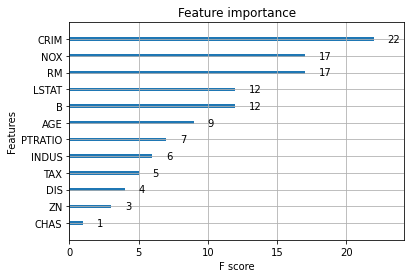

In [ ]:
#Feature importance vizualized
xgb.plot_importance(xg_reg)